Goal

The goal of this project is to answer common questions stated by stakeholders regarding data from a retail store

In [49]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import os
import seaborn as sns
import plotly.express as px

In [29]:
# Reading and concatenating all files

january = pd.read_csv('Sales_January_2019.csv')
february = pd.read_csv('Sales_February_2019.csv')
march = pd.read_csv('Sales_March_2019.csv')
april = pd.read_csv('Sales_April_2019.csv')
may = pd.read_csv('Sales_May_2019.csv')
june = pd.read_csv('Sales_June_2019.csv')
july = pd.read_csv('Sales_July_2019.csv')
august= pd.read_csv('Sales_August_2019.csv')
september = pd.read_csv('Sales_September_2019.csv')
october = pd.read_csv('Sales_October_2019.csv')
november = pd.read_csv('Sales_November_2019.csv')
december = pd.read_csv('Sales_December_2019.csv')


df =pd.concat([january,february,march,april,may,june,july,august,september,october,november,december])

In [30]:
# Data previsualization
df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"


In [35]:

# Creating the month column, parsing the two first characters in Order Date 
df['month'] = df['Order Date'].str[0:2]


In [36]:
# Checking data types
df.dtypes
     

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

Cleaning

In [37]:
# Dropping null values
df[df.isnull().any(axis=1)]

df = df.dropna(how='all')

In [38]:
# Getting rid of the 'Or' in Order Date
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [42]:

# Transforming data types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m-%d-%Y')

In [43]:
# Adding sales column
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df['sales'].head()

0    700.00
1     14.95
2     23.98
3    149.99
4     11.99
Name: sales, dtype: float64

In [48]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month', 'sales'],
      dtype='object')

In [47]:
df.rename(columns={
    'Order ID':'order_id',
    'Product':'product',
    'Quantity Ordered':'quantity_ordered',
    'Price Each':'price_each',
    'Order Date':'order_date',
    'Purchase Address':'purchase_address'
},inplace=True)

Analysis and Share

# What was the best month for sales?

In [81]:
# groupimg by month
month_grp =df.groupby('month').sum(numeric_only=True).reset_index()


fig =px.bar(month_grp,x='month',y='sales',title='Sales by Month',labels={'sales':'Sales in USD ($)','month':'Month Number'},
           text_auto='.2s',template='ggplot2'
           )

fig.update_layout(
    title={
        'text': "Sales by Month",
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig.show()






The months of October and December are amongst the best in term of sales

# What city had the highest number of sales?

In [88]:
# Adding a city column
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]


df['city'] = df['purchase_address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}" )
     

In [101]:
# Groupping by city and plotting the results

city_grp=df.groupby('city').sum(numeric_only=True).sort_values(by='sales', ascending=True).reset_index()

fig_city =px.bar(city_grp,x='sales',y='city',labels={'sales':'Sales in USD ($)','city':'City'},
           text_auto='.2s',template='ggplot2'
           )

fig_city.update_layout(
    title={
        'text': "Top cities by # of sales",
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig_city.show()


We can see that the cities with the highest number of sales are located in California

# At what time should we display adverstisements to maximize likelihood of customer's buying product?

In [103]:
# Creating hour and minute columns
df['hour'] = df['order_date'].dt.hour
df['minute'] = df['order_date'].dt.minute

In [114]:

# Groupping by hour and plotting the results

hour_grp =df.groupby('hour').count().reset_index()

fig_hour =px.bar(hour_grp,x='hour',y='sales',labels={'sales':'Sales','hour':'Hours'},
           text_auto='.3s',template='ggplot2'
           )

fig_hour.update_layout(
    title={
        'text': "Sales by hour",
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig_hour.show()

We can see two peaks, one between 11:00 - 13:00 and the other between 18:00 and 20:00 hours

# What product sold the most?

In [129]:
# Groupping by product and showing results

fig_pro =df.groupby('product').sum(numeric_only=True)['quantity_ordered'].sort_values().reset_index()

fig_pro =px.bar(fig_pro,x='quantity_ordered',y='product',labels={'product':'Products','quantity_ordered':'Quantity Ordered'},
           text_auto='.3s',template='ggplot2'
           )

fig_pro.update_layout(
    title={
        'text': "Most sold products",
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig_pro.show()




This graph shows batteries, charging cables and headphones as the most sold products

# Why did that product sold the most?

In [133]:
# Creating grouping variables for products and prices

products = df.groupby('product').sum(numeric_only=True)['quantity_ordered']
prices = df.groupby('product').mean(numeric_only=True)['price_each']

# Turning the variables into Data Frames
prices = pd.DataFrame(prices)
products = pd.DataFrame(products)


# Joining both Data Frames into one
prod_price = products.join(prices)
     

C:\Users\USER\AppData\Local\Temp\ipykernel_9100\51303972.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



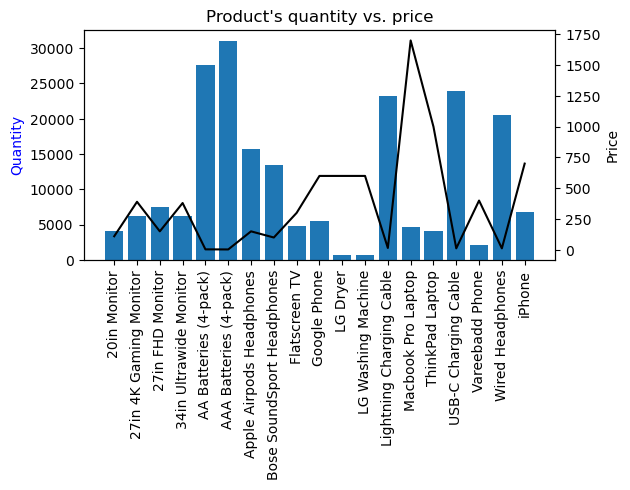

In [135]:
# Showing the results

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x=prod_price.index, height=prod_price['quantity_ordered'])
sns.plot(prod_price.index, prod_price['price_each'],color='k')

ax1.set_ylabel('Quantity', color='b')
ax2.set_ylabel('Price',color='k')
ax1.set_xticklabels(prod_price.index,rotation='vertical')
plt.tight_layout()
plt.title("Product's quantity vs. price" )
plt.show()
     

As you can see, generally the products which have lower prices, have a greater demand

Conclusion:

My analysis has provided insights of the retail data, answering the questions posted by the stakeholders